# Exploring the Mnist Dataset

In [26]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import scipy as sp

In [3]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [4]:
ds_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/Users/danieldelijani/tensorflow_datasets/mnist/3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

In [7]:
overall_image = np.zeros((28, 28, 1))
for image in tfds.as_numpy(ds_train):
    im = image[0]
    overall_image = np.add(overall_image, im)
overall_image

array([[[0.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [1.260000e+02],
        [4.700000e+02],
        [2.160000e+02],
        [9.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [0.000000e+00]],

       [[0.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [0.000000e+00],
        [1.600000e+01],
        [5.500000e+01],
        [5.570000e+02],
        [1.457000e+03],
        [2.623000e+03],
        [3.846000e+03],
        [7.208000e+03],
        [9.644000e+03],
        [1.045100e+04],
        [1.064

In [8]:
print(overall_image.shape)
overall_image = np.squeeze(overall_image)
print(overall_image.shape)

(28, 28, 1)
(28, 28)


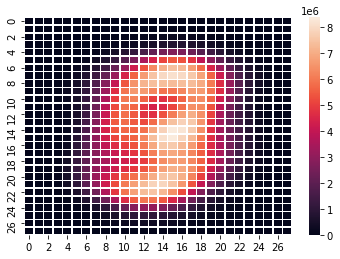

In [11]:
ax = sns.heatmap(overall_image, linewidth=.5)
plt.show()

#### Correlation

In [27]:
correlation, p_value = sp.stats.pearsonr(overall_image.flatten(), reshaped_weights.flatten())
print(f"correlation = {correlation}\np_value = {p_value}")

NameError: name 'reshaped_weights' is not defined

### Get standard deviation of each pixel
for each pixel, average for 1 is ___
                average for 2 is ___
                ...
                get the standard deviation for that pixel
                plot that on heatmap


In [13]:
import copy
average_image_hashmap = {}
for image, label in tfds.as_numpy(ds_train):
    if label in average_image_hashmap:
        old_image = copy.deepcopy(average_image_hashmap[label])
        new_image = np.add(old_image, image)
        average_image_hashmap[label] = new_image
    else:
        average_image_hashmap[label] = image


In [14]:
i = 0
for image, label in tfds.as_numpy(ds_train):
    if i == 0: 
        image_0 = image
        label_0 = label
        i+=1
    if i == 1:
        image_1 = image
        label_1 = label
        break

In [15]:
total_image = np.add(np.squeeze(image_0), np.squeeze(image_1))

In [16]:
np.add(np.array([0, 1, 2, 3, 4]),np.array([9, 1, 2, 3, 4]))

array([9, 2, 4, 6, 8])

In [17]:
total_image.shape

(28, 28)

In [18]:
total_image.max()

254

In [19]:
np.squeeze(average_image_hashmap[0]).shape

(28, 28)

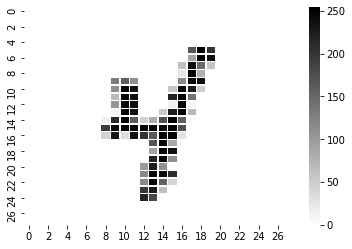

In [20]:
ax = sns.heatmap(np.squeeze(total_image), linewidth=.5, cmap='binary')
plt.show()

#### Visualize averages for each number individually

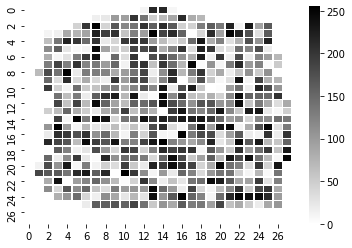

In [21]:
ax = sns.heatmap(np.squeeze(average_image_hashmap[2]), linewidth=.5, cmap='binary')
plt.show()

#### Get the standard deviation for each pixel

In [22]:
overall_averages = np.array(list(average_image_hashmap.values())).squeeze()
overall_averages.shape

(10, 28, 28)

In [23]:
standard_deviations = np.std(overall_averages, axis=0)
standard_deviations.shape

(28, 28)

#### Visualization

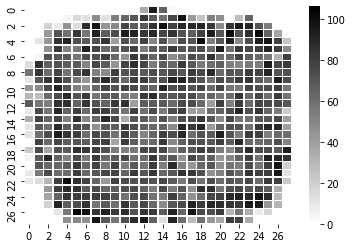

In [24]:
ax = sns.heatmap(standard_deviations, linewidth=.5, cmap='binary')
plt.show()

#### Correlation

In [25]:
correlation, p_value = sp.stats.pearsonr(standard_deviations.flatten(), reshaped_weights.flatten())
print(f"correlation = {correlation}\np_value = {p_value}")

NameError: name 'sp' is not defined